### Data cleaning and exploration

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import os

In [22]:
dataset = '../Data/Climate_Dataset.xlsx'
df_climate =  pd.read_excel(dataset)

In [55]:
df_climate.head()

,code,name,1901-07,1902-07,1903-07,1904-07,1905-07,1906-07,1907-07,1908-07,...,2015-07,2016-07,2017-07,2018-07,2019-07,2020-07,2021-07,2022-07,2023-07,avg_temp_recent
0,ABW,Aruba (Neth.),28.22,27.79,27.89,27.62,27.68,27.58,27.56,27.46,...,29.68,29.71,29.27,28.95,29.33,29.34,29.04,28.81,29.39,29.0955
1,AFG,Afghanistan,12.79,13.00,11.82,12.14,12.03,12.52,11.90,12.22,...,13.78,14.26,13.88,14.18,13.80,13.19,14.34,14.51,14.67,13.7015
2,AGO,Angola,21.32,21.36,21.37,21.28,21.32,21.20,21.22,21.29,...,21.69,21.94,21.84,21.66,21.76,21.72,21.73,21.62,21.51,21.7330
3,AIA,Anguilla (U.K.),27.19,26.77,26.81,26.34,26.69,26.45,26.11,26.25,...,28.22,28.15,27.96,27.70,28.08,28.04,27.96,27.73,28.35,27.9310
4,ALB,Albania,11.36,11.14,11.64,11.56,11.41,11.45,11.21,11.06,...,13.00,12.90,12.81,13.49,13.47,13.17,12.84,13.44,13.86,12.7270


In [24]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Columns: 125 entries, code to 2023-07
dtypes: float64(123), object(2)
memory usage: 231.6+ KB


In [25]:
df_climate.describe()

,1901-07,1902-07,1903-07,1904-07,1905-07,1906-07,1907-07,1908-07,1909-07,1910-07,...,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2020-07,2021-07,2022-07,2023-07
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.00000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,18.858979,18.685915,18.765064,18.661404,18.734383,18.784170,18.530596,18.632043,18.673191,18.717404,...,19.888894,20.002383,20.034596,19.911574,19.94817,20.043745,20.060128,19.913702,19.973830,20.307447
std,8.881070,9.096911,8.862023,8.871705,8.885256,8.819018,8.969503,8.957605,8.941160,8.730815,...,8.449198,8.505147,8.566509,8.546302,8.40526,8.420080,8.408617,8.577162,8.303516,8.357080
min,-19.760000,-20.040000,-20.160000,-20.530000,-19.920000,-20.630000,-20.860000,-19.670000,-20.010000,-20.610000,...,-18.180000,-19.100000,-17.700000,-18.530000,-18.99000,-18.020000,-18.470000,-17.390000,-18.380000,-18.470000
25%,10.720000,10.660000,10.745000,10.715000,10.775000,10.715000,10.490000,10.510000,10.520000,10.865000,...,12.640000,12.685000,12.370000,12.375000,12.96500,12.980000,12.680000,12.400000,13.055000,13.205000
50%,22.810000,22.830000,22.760000,22.690000,22.710000,22.710000,22.630000,22.730000,22.700000,22.680000,...,23.650000,23.840000,23.780000,23.810000,23.74000,23.610000,23.550000,23.860000,23.730000,24.050000
75%,25.965000,25.890000,25.745000,25.610000,25.740000,25.720000,25.550000,25.640000,25.590000,25.600000,...,26.575000,26.915000,26.940000,26.760000,26.54500,26.785000,26.755000,26.685000,26.495000,27.005000
max,28.350000,28.630000,28.710000,28.750000,28.360000,28.550000,28.320000,28.600000,28.630000,28.510000,...,29.490000,29.680000,29.760000,29.610000,29.63000,29.330000,29.680000,30.040000,29.380000,29.960000


In [27]:
df_climate.shape

(237, 125)

In [29]:
df_climate.dtypes

code        object
name        object
1901-07    float64
1902-07    float64
1903-07    float64
            ...   
2019-07    float64
2020-07    float64
2021-07    float64
2022-07    float64
2023-07    float64
Length: 125, dtype: object

##### Checking for null/missing values

In [31]:
df_climate.isna().sum()

code       0
name       0
1901-07    2
1902-07    2
1903-07    2
          ..
2019-07    2
2020-07    2
2021-07    2
2022-07    2
2023-07    2
Length: 125, dtype: int64

##### **Reshaping the data**

In [54]:
# Step 1: Extract all columns from 2000 to 2023 (they look like "2000-07", "2001-07", etc.)
recent_years = [col for col in df_climate.columns if isinstance(col, str) and col.startswith(('200', '201'))]

# Step 2: Calculate the average of those recent years for each country
df_climate["avg_temp_recent"] = df_climate[recent_years].mean(axis=1)

# Step 3: Keep only relevant columns
df_climate_avg = df_climate[["code", "name", "avg_temp_recent"]].copy()


##### Creating a new row for **Africa**, so the merge can happen without conflict

In [60]:
# Step 4: Define all African countries
african_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", 
    "Central African Republic", "Chad", "Comoros", "Congo", "Democratic Republic of Congo", "Djibouti", 
    "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea",
    "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali",
    "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", 
    "São Tomé and Príncipe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", 
    "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
]


In [63]:
# Remove old 'Africa' rows with missing data
df_climate = df_climate[~((df_climate["name"] == "Africa") & (df_climate.isna().sum(axis=1) > 1))]

In [ ]:
# Filtering all african countries
africa_df = df_climate[df_climate["name"].isin(african_countries)]

# Calculate mean for every numeric column
africa_mean_row = africa_df.mean(numeric_only=True)

# create a full new row for Africa
africa_row = pd.DataFrame([{
    **{"code" : "AFR", "name" : "Africa"},
    **africa_mean_row.to_dict()
}])

# append it to main dataset
df_climate = pd.concat([df_climate, africa_row], ignore_index=True)



In [ ]:
# Accidentally made a copy of same row. 
df_climate = df_climate.drop(index=239).reset_index(drop=True)


In [ ]:
# Checking to see if everything is correct
df_climate[df_climate["name"] == "Africa"]


,code,name,1901-07,1902-07,1903-07,1904-07,1905-07,1906-07,1907-07,1908-07,...,2015-07,2016-07,2017-07,2018-07,2019-07,2020-07,2021-07,2022-07,2023-07,avg_temp_recent
237,AFR,Africa,23.750784,23.83902,23.807255,23.68,23.755098,23.701373,23.544902,23.765294,...,24.643922,24.788627,24.621373,24.498235,24.583529,24.573725,24.651961,24.457255,24.746863,24.508706


#### 1. Plot **Global Temperature Trend Over Time**

In [75]:
year_cols = [col for col in df_climate.columns if col.endswith("-07")]

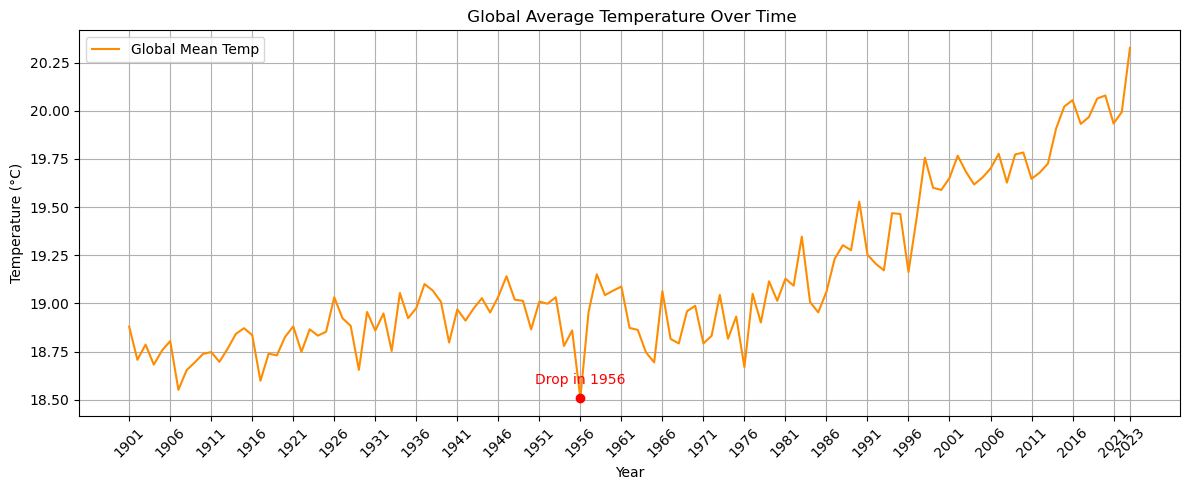

In [76]:
# Get year columns and global means
global_means = df_climate[year_cols].mean()
years = [int(col.split("-")[0]) for col in year_cols]
temps = global_means.values

# Calculate xticks: every 5th year + last year
xtick_years = [year for i, year in enumerate(years) if i % 5 == 0]
if years[-1] not in xtick_years:
    xtick_years.append(years[-1])

# Plot
plt.figure(figsize=(12, 5))
plt.plot(years, temps, label="Global Mean Temp", color="darkorange")  # ← No dots!
# Highlight 1956
if 1956 in years:
    idx_1956 = years.index(1956)
    temp_1956 = temps[idx_1956]
    plt.scatter(1956, temp_1956, color='red', zorder=5)
    plt.annotate("Drop in 1956", (1956, temp_1956), textcoords="offset points", xytext=(0,10), ha='center', color='red')

plt.xticks(ticks=xtick_years, rotation=45)

plt.title(" Global Average Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



##### The plot shows the global average temperature trend from 1901 to 2023, based on climate data across all countries. It clearly illustrates a consistent rise in global temperatures, especially after the 1980s, supporting evidence of global warming.

##### One particularly interesting point is the significant drop in 1956, which stands out from the otherwise rising pattern. This anomaly was highlighted instead of the high points, as it provides an opportunity to ask critical questions: Was this due to data inconsistency, a global climate event, or other external factors such as volcanic activity or post-war impacts?

##### Focusing on a dip rather than a peak allows for deeper analysis and avoids stating the obvious — that temperatures are rising. It's more analytical to investigate deviations from expected behavior than to highlight a well-known trend.

#### 2. **Heatmap of Recent Temps for the 50 Hottest Countries** 

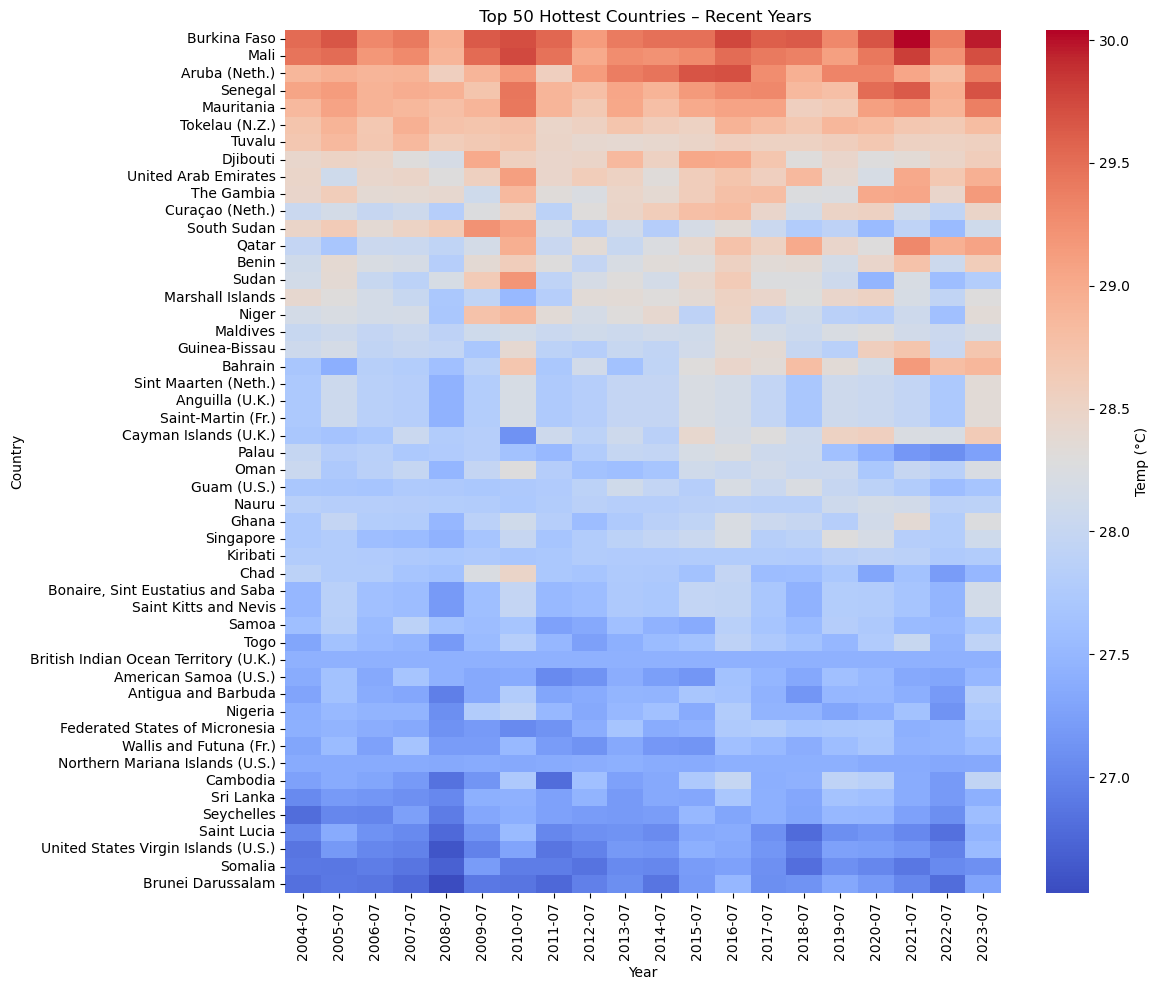

In [80]:
# Filter top 50 hottest based on avg_temp_recent
top50 = df_climate.sort_values(by="avg_temp_recent", ascending=False).head(50)

# Get recent years
recent_cols = [col for col in df_climate.columns if col.endswith("-07")][-20:]

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(top50.set_index("name")[recent_cols], cmap="coolwarm", cbar_kws={'label': 'Temp (°C)'})
plt.title(" Top 50 Hottest Countries – Recent Years")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



##### This heatmap visualizes the temperature development in the top 50 hottest countries from 2004 to 2023. The countries were selected based on their average recent temperature (avg_temp_recent), allowing for focused insight into climate changes in already heat-stressed regions.

##### The red shades indicate higher temperatures, while blue shades are relatively cooler values within this very warm range (generally above 27°C). Notably, several countries such as Burkina Faso, Mali, and Aruba show a strong deepening of red tones in recent years, suggesting a consistent and significant rise in average temperatures.

##### The map also reveals inter-country variation: while most countries show warming, some—like Somalia, Saint Lucia, or Sri Lanka—display less consistent increases, possibly due to geographic or meteorological buffering effects. This opens the door for deeper investigation into regional climate drivers.

##### By focusing on the hottest regions, the plot draws attention to countries likely to face the most immediate and severe consequences of rising temperatures — such as drought, reduced agricultural viability, and heat-related health risks.

### 3. Barplot **Top 10 countries with Highest Temp Increase From 1901-2023**

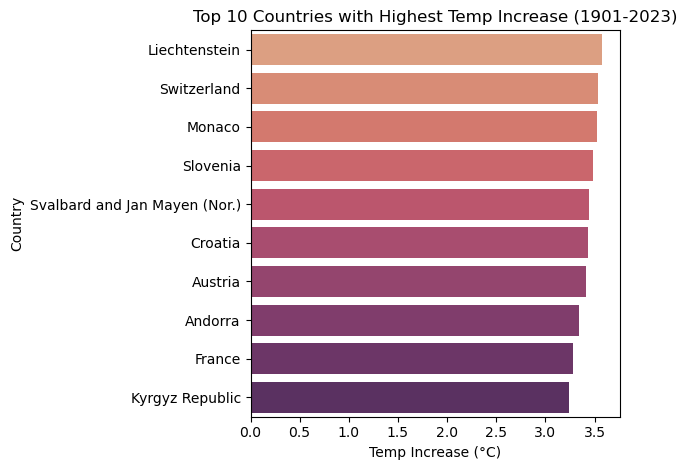

In [85]:
df_climate["temp_change"] = df_climate["2023-07"] - df_climate["1901-07"]
top_changers = df_climate.sort_values("temp_change", ascending=False).head(10)

plt.Figure(figsize=(10, 6))
sns.barplot(x="temp_change", y="name", data=top_changers, palette="flare", hue="name", legend=False)
plt.title("Top 10 Countries with Highest Temp Increase (1901-2023)")
plt.xlabel("Temp Increase (°C)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

##### This bar chart highlights the 10 countries that have experienced the largest increase in average temperature between 1901 and 2023. These values were calculated as the difference between average temperatures in 2023 and 1901.

##### Interestingly, the countries with the most significant warming trends are not African, but rather smaller, often temperate or alpine countries — such as Liechtenstein, Switzerland, Monaco, and Slovenia. This reveals that rate of warming is not strictly tied to regions traditionally considered “hot.”

##### For this project, which combines species traits with climate change data to predict extinction risk, this finding is essential. It challenges the assumption that animal populations in already-warm countries are the most vulnerable. Instead, it suggests that species living in countries with rapidly changing climates — even if they were originally temperate — may now be facing new, unadapted environmental stressors.

##### his barplot serves as a justification for incorporating climate trend data into species-level risk models. By identifying where climate stress is increasing most, we can better understand and anticipate where ecosystems may be under the most pressure — and which species, regardless of geography, may soon be at risk.

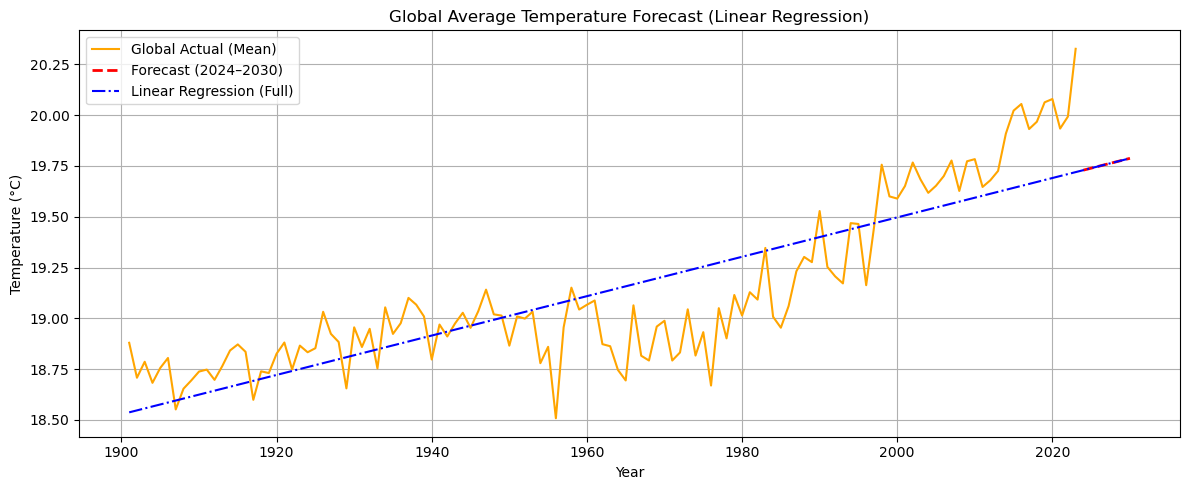

In [93]:
# Get temperature columns by year
year_cols = [col for col in df_climate.columns if col.endswith("-07")]

# Prepare X (years as ints) and y (global mean temp)
X_years = np.array([int(col.split("-")[0]) for col in year_cols]).reshape(-1, 1)
y_global = df_climate[year_cols].mean().values

# Train linear regression model
model = LinearRegression()
model.fit(X_years, y_global)

# Predict future years (2024–2030)
future_years = np.array(range(2024, 2031)).reshape(-1, 1)
future_preds = model.predict(future_years)

# Predict full regression line from 1901 to 2030
full_years = np.append(X_years.flatten(), future_years.flatten()).reshape(-1, 1)
full_preds = model.predict(full_years)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(X_years.flatten(), y_global, label="Global Actual (Mean)", color="orange")
plt.plot(future_years.flatten(), future_preds, label="Forecast (2024–2030)", linestyle="--", color="red", linewidth=2)
plt.plot(full_years.flatten(), full_preds, label="Linear Regression (Full)", linestyle="-.", color="blue")

plt.title("Global Average Temperature Forecast (Linear Regression)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##### This plot shows the global average temperature trend from 1901 to 2023, with a linear regression model fitted to the full range and a short-term forecast for 2024–2030.

##### The orange line reflects the real temperature data, which fluctuates due to natural climate variability, while the blue regression line reveals a steady upward trend. The red dashed segment represents the model's projection for the next few years — a continuation of this increasing trend.

##### The difference between the jagged orange line and the straight blue line shows how actual temperatures vary year to year, but also how the underlying climate pattern is clearly warming.

##### This clean, consistent trend justifies including temperature pressure in species extinction risk models. It also helps highlight the growing urgency of climate impacts across ecosystems.

In [94]:
df_climate.to_csv("cleaned_climate_data", index=False)